# 草稿

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [37]:
class TensorDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [31]:
x_data = np.random.randint(1,100,100)
y_data = 2 * x_data + np.random.randint(-20,20,100)

In [38]:
tensor_dataset = TensorDataset(x_data, y_data)
print(tensor_dataset[1])
print(len(tensor_dataset))

(17, 29)
100


In [54]:
tensor_dataloader = DataLoader(tensor_dataset,   # 封装的对象
                               batch_size=5,     # 输出的batch size
                               shuffle=True,     # 随机输出
                               num_workers=0)    # 只有1个进程
# 以for循环形式输出
for data, target in tensor_dataloader:
    # print(data, target)
    for x_data, y_data in zip(data, target):
        print(x_data, y_data)

tensor(10, dtype=torch.int32) tensor(29, dtype=torch.int32)
tensor(95, dtype=torch.int32) tensor(188, dtype=torch.int32)
tensor(73, dtype=torch.int32) tensor(165, dtype=torch.int32)
tensor(81, dtype=torch.int32) tensor(152, dtype=torch.int32)
tensor(48, dtype=torch.int32) tensor(91, dtype=torch.int32)
tensor(5, dtype=torch.int32) tensor(26, dtype=torch.int32)
tensor(54, dtype=torch.int32) tensor(119, dtype=torch.int32)
tensor(88, dtype=torch.int32) tensor(192, dtype=torch.int32)
tensor(54, dtype=torch.int32) tensor(93, dtype=torch.int32)
tensor(93, dtype=torch.int32) tensor(190, dtype=torch.int32)
tensor(47, dtype=torch.int32) tensor(77, dtype=torch.int32)
tensor(59, dtype=torch.int32) tensor(131, dtype=torch.int32)
tensor(51, dtype=torch.int32) tensor(108, dtype=torch.int32)
tensor(46, dtype=torch.int32) tensor(76, dtype=torch.int32)
tensor(95, dtype=torch.int32) tensor(183, dtype=torch.int32)
tensor(52, dtype=torch.int32) tensor(122, dtype=torch.int32)
tensor(24, dtype=torch.int32) t

# mini-batch梯度下降算法

In [93]:
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

class TensorDataset(Dataset):
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __getitem__(self, index):
		return self.x[index], self.y[index]

	def __len__(self):
		return len(self.x)

x_data = np.arange(0,100) / 100
y_data = 2 * x_data + np.random.randint(0,20,100) / 100
# x_data = np.random.randn(100)
# y_data = 2 * x_data
tensor_dataset = TensorDataset(x_data, y_data)

"""
打印测试
print(tensor_dataset[1])
print(len(tensor_dataset))
"""

tensor_dataloader = DataLoader(tensor_dataset,   # 封装的对象
                               batch_size=5,     # 输出的batch size
                               shuffle=True,     # 随机输出
                               num_workers=0)    # 只有1个进程
"""# 以for循环形式输出
for data, target in tensor_dataloader:
	print(data, target)
	plt.scatter(data, target)
	plt.show()"""

def forward(x, w=0):
	return x * w

def cost(x, y, w=0):
	cost = 0
	if len(x) == 1:
		y_predict = forward(x[0], w)
		cost += (y_predict - y[0]) ** 2
	else:
		for x_data, y_data in zip(x, y):
			y_predict = forward(x_data, w)
			cost += (y_predict - y_data) ** 2
	return cost / len(x)

def gradient(x, y, w=0):
	gra = 0
	for x_data, y_data in zip(x, y):
		gra += 2 * (forward(x_data, w) - y_data) * x_data
	return gra / len(x)

def main(tensor_dataloader, loop=1000, step=0.001, w=0):
	loss = []
	for i in range(loop):
		for (x, y) in tensor_dataloader:
			loss0 = cost(x, y, w)
			w -= step * gradient(x, y, w)
		loss.append(loss0)
		print('epoch:', i, 'w=', w, 'loss=', loss0)
	return loss, w

if __name__ == '__main__':
	loss,w = main(tensor_dataloader)

epoch: 0 w= tensor(0.0281, dtype=torch.float64) loss= tensor(0.9294, dtype=torch.float64)
epoch: 1 w= tensor(0.0559, dtype=torch.float64) loss= tensor(1.1490, dtype=torch.float64)
epoch: 2 w= tensor(0.0833, dtype=torch.float64) loss= tensor(1.5006, dtype=torch.float64)
epoch: 3 w= tensor(0.1103, dtype=torch.float64) loss= tensor(1.6587, dtype=torch.float64)
epoch: 4 w= tensor(0.1370, dtype=torch.float64) loss= tensor(1.0463, dtype=torch.float64)
epoch: 5 w= tensor(0.1633, dtype=torch.float64) loss= tensor(1.3400, dtype=torch.float64)
epoch: 6 w= tensor(0.1893, dtype=torch.float64) loss= tensor(1.2341, dtype=torch.float64)
epoch: 7 w= tensor(0.2150, dtype=torch.float64) loss= tensor(2.1734, dtype=torch.float64)
epoch: 8 w= tensor(0.2403, dtype=torch.float64) loss= tensor(1.3483, dtype=torch.float64)
epoch: 9 w= tensor(0.2653, dtype=torch.float64) loss= tensor(1.1102, dtype=torch.float64)
epoch: 10 w= tensor(0.2899, dtype=torch.float64) loss= tensor(0.4170, dtype=torch.float64)
epoch: 11

epoch: 93 w= tensor(1.5278, dtype=torch.float64) loss= tensor(0.1303, dtype=torch.float64)
epoch: 94 w= tensor(1.5360, dtype=torch.float64) loss= tensor(0.1485, dtype=torch.float64)
epoch: 95 w= tensor(1.5441, dtype=torch.float64) loss= tensor(0.1813, dtype=torch.float64)
epoch: 96 w= tensor(1.5520, dtype=torch.float64) loss= tensor(0.0883, dtype=torch.float64)
epoch: 97 w= tensor(1.5599, dtype=torch.float64) loss= tensor(0.0808, dtype=torch.float64)
epoch: 98 w= tensor(1.5677, dtype=torch.float64) loss= tensor(0.0676, dtype=torch.float64)
epoch: 99 w= tensor(1.5753, dtype=torch.float64) loss= tensor(0.1204, dtype=torch.float64)
epoch: 100 w= tensor(1.5829, dtype=torch.float64) loss= tensor(0.1298, dtype=torch.float64)
epoch: 101 w= tensor(1.5903, dtype=torch.float64) loss= tensor(0.1072, dtype=torch.float64)
epoch: 102 w= tensor(1.5977, dtype=torch.float64) loss= tensor(0.0988, dtype=torch.float64)
epoch: 103 w= tensor(1.6050, dtype=torch.float64) loss= tensor(0.1584, dtype=torch.floa

epoch: 193 w= tensor(1.9859, dtype=torch.float64) loss= tensor(0.0166, dtype=torch.float64)
epoch: 194 w= tensor(1.9881, dtype=torch.float64) loss= tensor(0.0175, dtype=torch.float64)
epoch: 195 w= tensor(1.9903, dtype=torch.float64) loss= tensor(0.0130, dtype=torch.float64)
epoch: 196 w= tensor(1.9925, dtype=torch.float64) loss= tensor(0.0103, dtype=torch.float64)
epoch: 197 w= tensor(1.9946, dtype=torch.float64) loss= tensor(0.0129, dtype=torch.float64)
epoch: 198 w= tensor(1.9967, dtype=torch.float64) loss= tensor(0.0185, dtype=torch.float64)
epoch: 199 w= tensor(1.9987, dtype=torch.float64) loss= tensor(0.0101, dtype=torch.float64)
epoch: 200 w= tensor(2.0007, dtype=torch.float64) loss= tensor(0.0047, dtype=torch.float64)
epoch: 201 w= tensor(2.0027, dtype=torch.float64) loss= tensor(0.0181, dtype=torch.float64)
epoch: 202 w= tensor(2.0047, dtype=torch.float64) loss= tensor(0.0122, dtype=torch.float64)
epoch: 203 w= tensor(2.0067, dtype=torch.float64) loss= tensor(0.0145, dtype=tor

epoch: 288 w= tensor(2.1060, dtype=torch.float64) loss= tensor(0.0048, dtype=torch.float64)
epoch: 289 w= tensor(2.1066, dtype=torch.float64) loss= tensor(0.0081, dtype=torch.float64)
epoch: 290 w= tensor(2.1073, dtype=torch.float64) loss= tensor(0.0011, dtype=torch.float64)
epoch: 291 w= tensor(2.1079, dtype=torch.float64) loss= tensor(0.0103, dtype=torch.float64)
epoch: 292 w= tensor(2.1085, dtype=torch.float64) loss= tensor(0.0045, dtype=torch.float64)
epoch: 293 w= tensor(2.1091, dtype=torch.float64) loss= tensor(0.0030, dtype=torch.float64)
epoch: 294 w= tensor(2.1097, dtype=torch.float64) loss= tensor(0.0091, dtype=torch.float64)
epoch: 295 w= tensor(2.1103, dtype=torch.float64) loss= tensor(0.0057, dtype=torch.float64)
epoch: 296 w= tensor(2.1108, dtype=torch.float64) loss= tensor(0.0058, dtype=torch.float64)
epoch: 297 w= tensor(2.1114, dtype=torch.float64) loss= tensor(0.0058, dtype=torch.float64)
epoch: 298 w= tensor(2.1120, dtype=torch.float64) loss= tensor(0.0063, dtype=tor

epoch: 384 w= tensor(2.1406, dtype=torch.float64) loss= tensor(0.0040, dtype=torch.float64)
epoch: 385 w= tensor(2.1408, dtype=torch.float64) loss= tensor(0.0016, dtype=torch.float64)
epoch: 386 w= tensor(2.1410, dtype=torch.float64) loss= tensor(0.0040, dtype=torch.float64)
epoch: 387 w= tensor(2.1412, dtype=torch.float64) loss= tensor(0.0029, dtype=torch.float64)
epoch: 388 w= tensor(2.1413, dtype=torch.float64) loss= tensor(0.0014, dtype=torch.float64)
epoch: 389 w= tensor(2.1415, dtype=torch.float64) loss= tensor(0.0033, dtype=torch.float64)
epoch: 390 w= tensor(2.1417, dtype=torch.float64) loss= tensor(0.0027, dtype=torch.float64)
epoch: 391 w= tensor(2.1418, dtype=torch.float64) loss= tensor(0.0039, dtype=torch.float64)
epoch: 392 w= tensor(2.1420, dtype=torch.float64) loss= tensor(0.0035, dtype=torch.float64)
epoch: 393 w= tensor(2.1422, dtype=torch.float64) loss= tensor(0.0048, dtype=torch.float64)
epoch: 394 w= tensor(2.1423, dtype=torch.float64) loss= tensor(0.0028, dtype=tor

epoch: 481 w= tensor(2.1505, dtype=torch.float64) loss= tensor(0.0076, dtype=torch.float64)
epoch: 482 w= tensor(2.1506, dtype=torch.float64) loss= tensor(0.0059, dtype=torch.float64)
epoch: 483 w= tensor(2.1506, dtype=torch.float64) loss= tensor(0.0019, dtype=torch.float64)
epoch: 484 w= tensor(2.1507, dtype=torch.float64) loss= tensor(0.0043, dtype=torch.float64)
epoch: 485 w= tensor(2.1507, dtype=torch.float64) loss= tensor(0.0024, dtype=torch.float64)
epoch: 486 w= tensor(2.1508, dtype=torch.float64) loss= tensor(0.0069, dtype=torch.float64)
epoch: 487 w= tensor(2.1508, dtype=torch.float64) loss= tensor(0.0073, dtype=torch.float64)
epoch: 488 w= tensor(2.1508, dtype=torch.float64) loss= tensor(0.0069, dtype=torch.float64)
epoch: 489 w= tensor(2.1509, dtype=torch.float64) loss= tensor(0.0059, dtype=torch.float64)
epoch: 490 w= tensor(2.1509, dtype=torch.float64) loss= tensor(0.0073, dtype=torch.float64)
epoch: 491 w= tensor(2.1510, dtype=torch.float64) loss= tensor(0.0055, dtype=tor

epoch: 579 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0092, dtype=torch.float64)
epoch: 580 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0013, dtype=torch.float64)
epoch: 581 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0049, dtype=torch.float64)
epoch: 582 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0084, dtype=torch.float64)
epoch: 583 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0118, dtype=torch.float64)
epoch: 584 w= tensor(2.1533, dtype=torch.float64) loss= tensor(0.0014, dtype=torch.float64)
epoch: 585 w= tensor(2.1534, dtype=torch.float64) loss= tensor(0.0027, dtype=torch.float64)
epoch: 586 w= tensor(2.1534, dtype=torch.float64) loss= tensor(0.0041, dtype=torch.float64)
epoch: 587 w= tensor(2.1534, dtype=torch.float64) loss= tensor(0.0035, dtype=torch.float64)
epoch: 588 w= tensor(2.1534, dtype=torch.float64) loss= tensor(0.0034, dtype=torch.float64)
epoch: 589 w= tensor(2.1534, dtype=torch.float64) loss= tensor(0.0042, dtype=tor

epoch: 680 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0056, dtype=torch.float64)
epoch: 681 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0079, dtype=torch.float64)
epoch: 682 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0023, dtype=torch.float64)
epoch: 683 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0017, dtype=torch.float64)
epoch: 684 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0154, dtype=torch.float64)
epoch: 685 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0113, dtype=torch.float64)
epoch: 686 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0025, dtype=torch.float64)
epoch: 687 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0031, dtype=torch.float64)
epoch: 688 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0112, dtype=torch.float64)
epoch: 689 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0044, dtype=torch.float64)
epoch: 690 w= tensor(2.1541, dtype=torch.float64) loss= tensor(0.0021, dtype=tor

epoch: 773 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0037, dtype=torch.float64)
epoch: 774 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0024, dtype=torch.float64)
epoch: 775 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0080, dtype=torch.float64)
epoch: 776 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0023, dtype=torch.float64)
epoch: 777 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0056, dtype=torch.float64)
epoch: 778 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0106, dtype=torch.float64)
epoch: 779 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0023, dtype=torch.float64)
epoch: 780 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0068, dtype=torch.float64)
epoch: 781 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0048, dtype=torch.float64)
epoch: 782 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0080, dtype=torch.float64)
epoch: 783 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0067, dtype=tor

epoch: 862 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0042, dtype=torch.float64)
epoch: 863 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0088, dtype=torch.float64)
epoch: 864 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0062, dtype=torch.float64)
epoch: 865 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0065, dtype=torch.float64)
epoch: 866 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0066, dtype=torch.float64)
epoch: 867 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0026, dtype=torch.float64)
epoch: 868 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0038, dtype=torch.float64)
epoch: 869 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0036, dtype=torch.float64)
epoch: 870 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0019, dtype=torch.float64)
epoch: 871 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0033, dtype=torch.float64)
epoch: 872 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0105, dtype=tor

epoch: 953 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0107, dtype=torch.float64)
epoch: 954 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0025, dtype=torch.float64)
epoch: 955 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0015, dtype=torch.float64)
epoch: 956 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0020, dtype=torch.float64)
epoch: 957 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0019, dtype=torch.float64)
epoch: 958 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0067, dtype=torch.float64)
epoch: 959 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0046, dtype=torch.float64)
epoch: 960 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0092, dtype=torch.float64)
epoch: 961 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0007, dtype=torch.float64)
epoch: 962 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0068, dtype=torch.float64)
epoch: 963 w= tensor(2.1543, dtype=torch.float64) loss= tensor(0.0051, dtype=tor

<IPython.core.display.Javascript object>


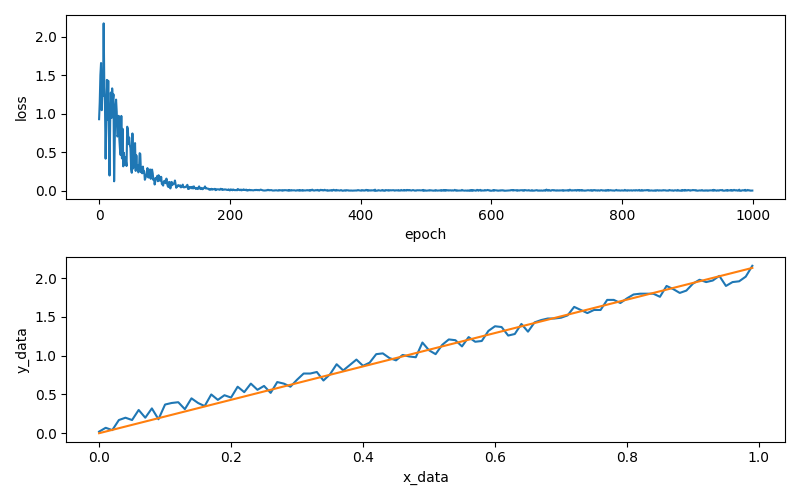

In [107]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(list(range(1000)), loss, label='GD')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplots_adjust(wspace=0, hspace=0.3)#调整子图间距
plt.subplot(212)
plt.plot(x_data, y_data, label='origin')
plt.plot(x_data, w*x_data, label='SGD')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.tight_layout()#调整整体空白
plt.show()

# Relu运算

<IPython.core.display.Javascript object>


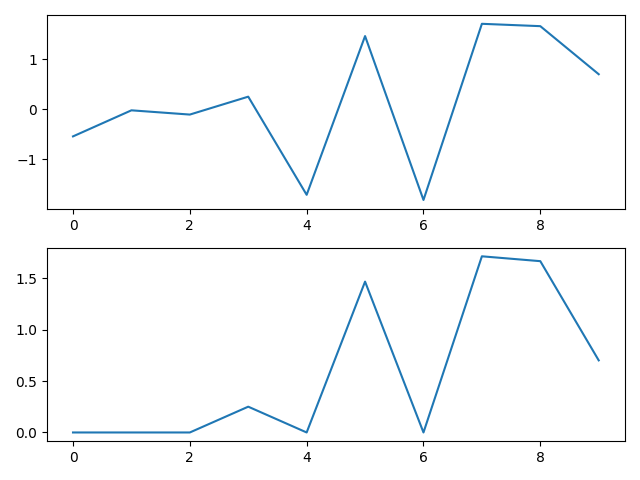

In [106]:
import numpy as np
x = np.random.randn(10)
y = np.maximum(x, 0)

%matplotlib notebook
plt.subplot(211)
plt.plot(range(len(x)),x)
plt.show()

plt.subplot(212)
plt.plot(range(len(y)),y)
plt.tight_layout()
plt.show()